In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
# Load dataset (CSV)
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

# View first 5 rows
df.head()


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Check class distribution
df['Label'].value_counts()



Label
ham     4825
spam     747
Name: count, dtype: int64

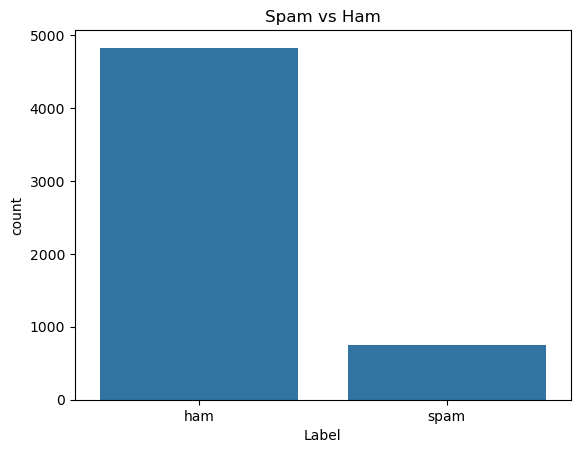

In [11]:
# Visualize distribution
sns.countplot(x='Label', data=df)
plt.title("Spam vs Ham")
plt.show()


In [13]:
# Encode labels: ham -> 0, spam -> 1
df['Label'] = df['Label'].map({'ham':0, 'spam':1})

# Check
df.head()


,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X = df['Message']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [21]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(X_test_vec)


Accuracy: 0.9838565022421525


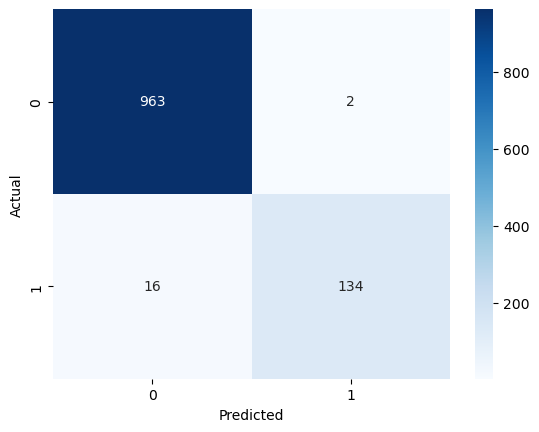

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed report
print(classification_report(y_test, y_pred))
